In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.datasets as dsets
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Subtract, Lambda
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
mnist = dsets.mnist.load_data()

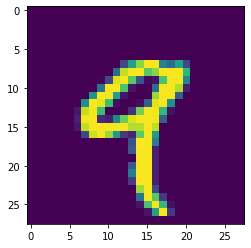

In [3]:
plt.imshow(mnist[0][0][4])

In [4]:
np.shape(mnist[1][1])

(10000,)

In [5]:
mnist = dsets.mnist.load_data()
train_data = mnist[0][0]
train_label = mnist[0][1]
test_data = mnist[1][0]
test_label = mnist[1][1]
print(np.shape(mnist[0][1]))
# for i in range(len(train_data)):
#     train_data[i] = np.array(train_data[i]).astype(float)/255
# train_data[0]
# train_label = (tf.one_hot(train_label, 10))
# test_label = (tf.one_hot(test_label, 10))
print(len(np.ravel(test_label)))


(60000,)
10000


In [6]:
train_data = np.expand_dims(train_data, axis=3)# Your Code Here
test_data = np.expand_dims(test_data, axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)
    
# Keep These
print(train_data.shape)
print(test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
# model.summary()

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(train_data, train_label, batch_size=32),
                              steps_per_epoch=len(train_data) / 32,
                              epochs=5,
                              validation_data=validation_datagen.flow(test_data, test_label, batch_size=32),
                              validation_steps=len(test_data) / 32)

model.evaluate(test_data, test_label, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-7-16b9d4aa433a>:28) ]] [Op:__inference_train_function_848]

Function call stack:
train_function


In [7]:
model.save('cnn_mnist_model.h5')

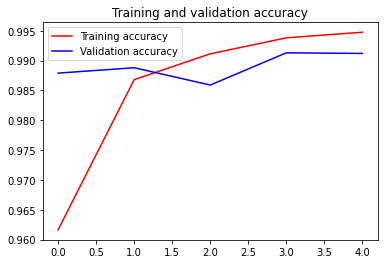

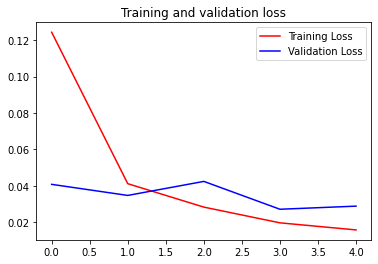

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
type(train_data[0])

numpy.ndarray

(28, 28)
(1, 28, 28, 1)
6


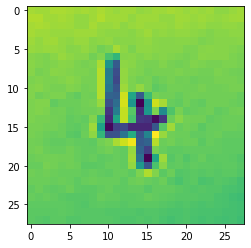

In [41]:
import cv2
test_image = plt.imread('4.jpg')
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
# test_image = cv2.bitwise_not(test_image)
# test_image = test_data[199]
plt.imshow(test_image)
print(test_image.shape)
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = np.expand_dims(test_image, axis=3)
print(test_image.shape)
pred = model.predict(test_image)
print(np.argmax(pred))
# score = list()
# for sample in np.array([samples2[0],samples2[11],samples2[22],samples2[32],samples2[45],samples2[58],samples2[65],samples2[79],samples2[81],samples2[98]]):
#     image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
#     score.append( model.predict( [ image , sample ])[0] )
# index = np.argmax( scores[i] )
# print(index)

In [15]:
train_data.shape

(60000, 28, 28, 1)